# Exploring past faculty data
 
Author: Andrea Mock
    
Having collected data about faculty who worked at Wellesley starting with the 2012-2013 academic year we want to make use of the various datasets that were collected to see any trends and developments of faculty who worked for Wellesley College. 

This notebook is broken down into the following sections: 

1. Loading data
2. Faculty over the years
3. Departments over the years

## 1. Loading data
From all the json files that contained the cleaned faculty data we load the data to dataframes for further analysis.

In [29]:
import pandas as pd

# import for plotting later
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

from collections import Counter

In [5]:
# load faculty data
prof_2012 = pd.read_json('cleaned2012faculty_data.json')
prof_2013 = pd.read_json('cleaned2013faculty_data.json')
prof_2014 = pd.read_json('cleaned2014faculty_data.json')
prof_2015 = pd.read_json('cleaned2015faculty_data.json')
prof_2016 = pd.read_json('cleaned2016faculty_data.json')
prof_2017 = pd.read_json('cleaned2017faculty_data.json')
prof_2018 = pd.read_json('cleaned2018faculty_data.json')
prof_2019 = pd.read_json('cleaned2019faculty_data.json')
prof_2020 = pd.read_json('cleaned2020faculty_data.json')

In [6]:
all_dfs = [prof_2012,prof_2013,prof_2014,prof_2015,prof_2016,prof_2017,prof_2018,prof_2019,prof_2020]

In [4]:
# part of the 2019-2020 faculty data
prof_2019.head()

,name,title,title2,title3,education,colleges,degrees,role,dept
0,"Aadnani, Rachid",Senior Lecturer in Middle Eastern Studies,None,None,"[B.A., Universite Moulay Ismail (Morocco), M.A...","[Universite Moulay Ismail (Morocco), Dartmouth...","[B.A., M.A., Ph.D.]",Senior Lecturer,[Middle Eastern Studies]
1,"Abeberese, Ama Baafra",Assistant Professor of Economics,None,None,"[B.A., Wellesley College, M.A., M.Phil., Ph.D....","[Wellesley College, Columbia University]","[B.A., M.A., M.Phil., Ph.D.]",Assistant Professor,[Economics]
2,"Adams, Kris",Senior Music Performance Faculty in Vocal Jazz,None,None,"[B.M., Berklee College of Music, M.M., New Eng...","[Berklee College of Music, New England Conserv...","[B.M., M.M.]",Senior Music Performance Faculty,[Music]
3,"Adhikari, Prabal",Visiting Lecturer in Physics,None,None,"[B.A., Grinnell College, Ph.D., University of ...","[Grinnell College, University of Maryland]","[B.A., Ph.D.]",Visiting Lecturer,[Physics]
4,"Agosin, Marjorie",Professor of Spanish,None,None,"[B.A., University of Georgia, M.A., Ph.D., Ind...","[University of Georgia, Indiana University]","[B.A., M.A., Ph.D.]",Professor,[Spanish]


## 2. Faculty over the years
As a first step we are interested in the evolution of number of faculty members over the years and also seeing which faculty members have been there since the collection of our datasets began (since 2012). We can check the number of faculty per year by looking at the number of rows each dataset contains (as each row stands for a different faculty member). 

In [14]:
def facultyOverTime(dfs, start_year):
    """ 
    given a list containing various dataframes, return the number of faculty for that year, 
    returns a dataframe that contains information 
    """
    
    prof_counts = [] # list that keeps track of number of professors
    for df in dfs:
        prof_counts.append((start_year, df.shape[0]))
        start_year += 1
    return pd.DataFrame(prof_counts, columns=['year',"num_faculty"])

In [16]:
faculty_df = facultyOverTime(all_dfs, 2012)
faculty_df

,year,num_faculty
0,2012,454
1,2013,483
2,2014,478
3,2015,480
4,2016,471
5,2017,457
6,2018,443
7,2019,450
8,2020,451


Text(0.5, 1.0, 'Faculty numbers over the years')

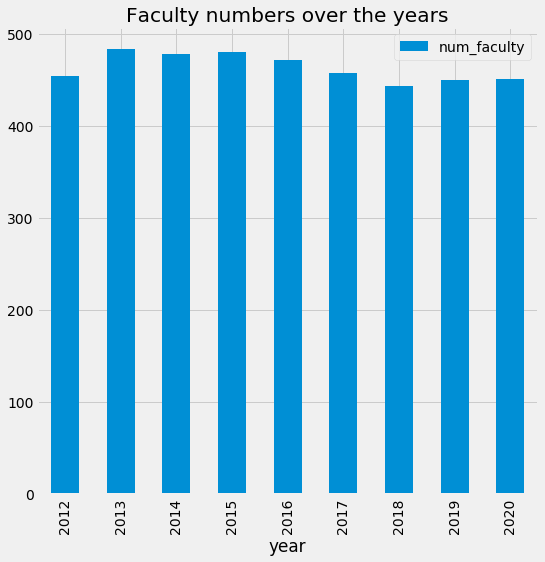

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
faculty_df.plot.bar(x='year', y='num_faculty', ax=ax)
ax.set_title('Faculty numbers over the years')

In [26]:
# get summary statistics about number of faculty members over the year
faculty_df['num_faculty'].describe()

count      9.000000
mean     463.000000
std       15.033296
min      443.000000
25%      451.000000
50%      457.000000
75%      478.000000
max      483.000000
Name: num_faculty, dtype: float64

As we can see the number of faculty members has not changed very much over the years, with a mean number of 463 faculty members for the years 2012 to 2021.

## 3. Departments over the years
Similarly to looking at the number of faculty members over the years we can also look at the departments with the most faculty members over the years and see if there are any changes over the years. 

In [65]:
def topDeptOverTime(dataframes, num):
    """
    returns a list of counters with num most common departments for each year
    """
    return [pd.DataFrame(Counter(df['dept'].explode()).most_common(num), columns=['dept','count']) for df in dataframes]

In [66]:
counters = topDeptOverTime(all_dfs, 10) 
counters[0] # counter for 2012 

,dept,count
0,Music,45
1,Physical Education,41
2,Biological Sciences,26
3,Chemistry,23
4,Economics,22
5,Art,20
6,English,18
7,Mathematics,17
8,Political Science,16
9,Psychology,15


In [67]:
# add year labels to each counter
def addYears(dataframes,start_year):
    year_counters = []
    for df in dataframes:
        df['year'] = start_year
        start_year +=1
        year_counters.append(df)
    return year_counters

In [72]:
# merging all dataframes 
merged_years_df = pd.concat(addYears(counters, 2012), ignore_index=True, sort=False)
merged_years_df

,dept,count,year
0,Music,45,2012
1,Physical Education,41,2012
2,Biological Sciences,26,2012
3,Chemistry,23,2012
4,Economics,22,2012
...,...,...,...
85,English,20,2020
86,Mathematics,20,2020
87,Economics,18,2020
88,Computer Science,18,2020


Using plotly express we can then visualize the top 10 departments over the years. Overall there has not been much fluctuation with the number of faculty members in the top departments (top meaning the departments with the most faculty members in any given year).

In [78]:
import plotly.express as px
fig = px.area(merged_years_df, x='year',y='count',color = "dept")
fig.show()